In [1]:
# Import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# unzip
import zipfile
import os

In [2]:
# Authenticating With API Server
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [3]:
# downoad single file
# data = 'ntnu-testimon/paysim1' - Changed
data = 'ealaxi/paysim1'
file = 'PS_20174392719_1491204439457_log.csv'
path = '../Data/'
#Signature: dataset_download_file(dataset, file_name, path=None, force=False, quiet=True)
api.dataset_download_file(dataset=data,file_name=file,path=path,force=True,quiet=False)

100%|██████████| 178M/178M [00:12<00:00, 14.5MB/s] 

True

In [4]:
# Unzip
with zipfile.ZipFile(path+'PS_20174392719_1491204439457_log.csv.zip', mode='r') as unzipit:
    unzipit.extractall(path=path)
# Delete ZIP file
os.remove(path+'PS_20174392719_1491204439457_log.csv.zip')

In [5]:
# create DataFrame
paysim = pd.read_csv(path+file)

In [6]:
paysim.shape

(6362620, 11)

In [7]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
paysim.isnull().values.any()

False

In [9]:
# Determine Null values
paysim.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# rename type, is a reserved python word & inconsistent column name 
paysim.rename(columns={'type':'transType', 'oldbalanceOrg': 'oldbalanceOrig'}, inplace=True)
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
print(format(paysim.transType.value_counts()),",")

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: transType, dtype: int64 ,


In [12]:
print(format(paysim.isFraud.value_counts()),",")

0    6354407
1       8213
Name: isFraud, dtype: int64 ,


In [13]:
# Origination to Destination does not match
print('Orgination:  ' + format(paysim.nameOrig.nunique(), ','))
print('Destination: ' + format(paysim.nameDest.nunique(), ','))

Orgination:  6,353,307
Destination: 2,722,362


In [14]:
# Add two addtional features
paysim['diffBalanceOrig'] = paysim.newbalanceOrig + paysim.amount - paysim.oldbalanceOrig
paysim['diffBalanceDest'] = paysim.oldbalanceDest + paysim.amount - paysim.newbalanceDest

In [15]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0.0,1864.28
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0.0,181.00
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0.0,21363.00
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0.0,11668.14


In [16]:
paysim.transType.value_counts(normalize=True)

CASH_OUT    0.351663
PAYMENT     0.338146
CASH_IN     0.219923
TRANSFER    0.083756
DEBIT       0.006512
Name: transType, dtype: float64

<AxesSubplot:ylabel='isFraud'>

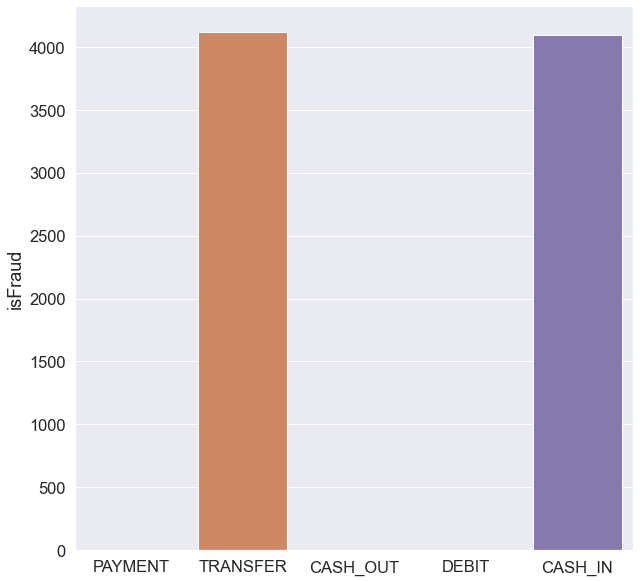

In [17]:
sns.set(font_scale = 1.5)
plt.figure(figsize=(10,10))
sns.barplot(x=paysim.transType.unique(),y=paysim.groupby("transType")["isFraud"].sum())

In [18]:
paysim['nameOrig'] = [x[0] for x in paysim['nameOrig']]
paysim['nameDest'] = [x[0] for x in paysim['nameDest']]

In [19]:
# 
paysim.drop(['isFlaggedFraud'], axis=1, inplace=True)

In [20]:
paysim.head()

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
0,1,PAYMENT,9839.64,C,170136.0,160296.36,M,0.0,0.0,0,0.0,9839.64
1,1,PAYMENT,1864.28,C,21249.0,19384.72,M,0.0,0.0,0,0.0,1864.28
2,1,TRANSFER,181.00,C,181.0,0.00,C,0.0,0.0,1,0.0,181.00
3,1,CASH_OUT,181.00,C,181.0,0.00,C,21182.0,0.0,1,0.0,21363.00
4,1,PAYMENT,11668.14,C,41554.0,29885.86,M,0.0,0.0,0,0.0,11668.14


In [21]:
paysim['nameOrig'].value_counts(dropna=False)
paysim['nameDest'].value_counts(dropna=False)

C    4211125
M    2151495
Name: nameDest, dtype: int64

In [22]:
paysim.sample(10)

,step,transType,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,diffBalanceOrig,diffBalanceDest
4815509,346,CASH_OUT,94506.02,C,0.0,0.0,C,523963.36,618469.38,0,94506.02,0.00
3675175,276,CASH_OUT,175096.91,C,11526.0,0.0,C,0.00,175096.91,0,163570.91,0.00
5796581,401,CASH_OUT,18086.80,C,0.0,0.0,C,291856.86,309943.67,0,18086.80,-0.01
250321,14,CASH_OUT,57373.18,C,0.0,0.0,C,4343663.17,4208185.99,0,57373.18,192850.36
1083413,129,PAYMENT,21717.16,C,0.0,0.0,M,0.00,0.00,0,21717.16,21717.16
3331735,253,PAYMENT,50216.18,C,43051.0,0.0,M,0.00,0.00,0,7165.18,50216.18
3050577,234,PAYMENT,15460.63,C,0.0,0.0,M,0.00,0.00,0,15460.63,15460.63
3850385,282,CASH_OUT,8186.43,C,0.0,0.0,C,100757.48,108943.91,0,8186.43,0.00
1827879,163,CASH_OUT,52828.05,C,5671.0,0.0,C,3181400.37,3234228.41,0,47157.05,0.01
3664850,276,PAYMENT,4894.40,C,11441.0,6546.6,M,0.00,0.00,0,0.00,4894.40


<AxesSubplot:>

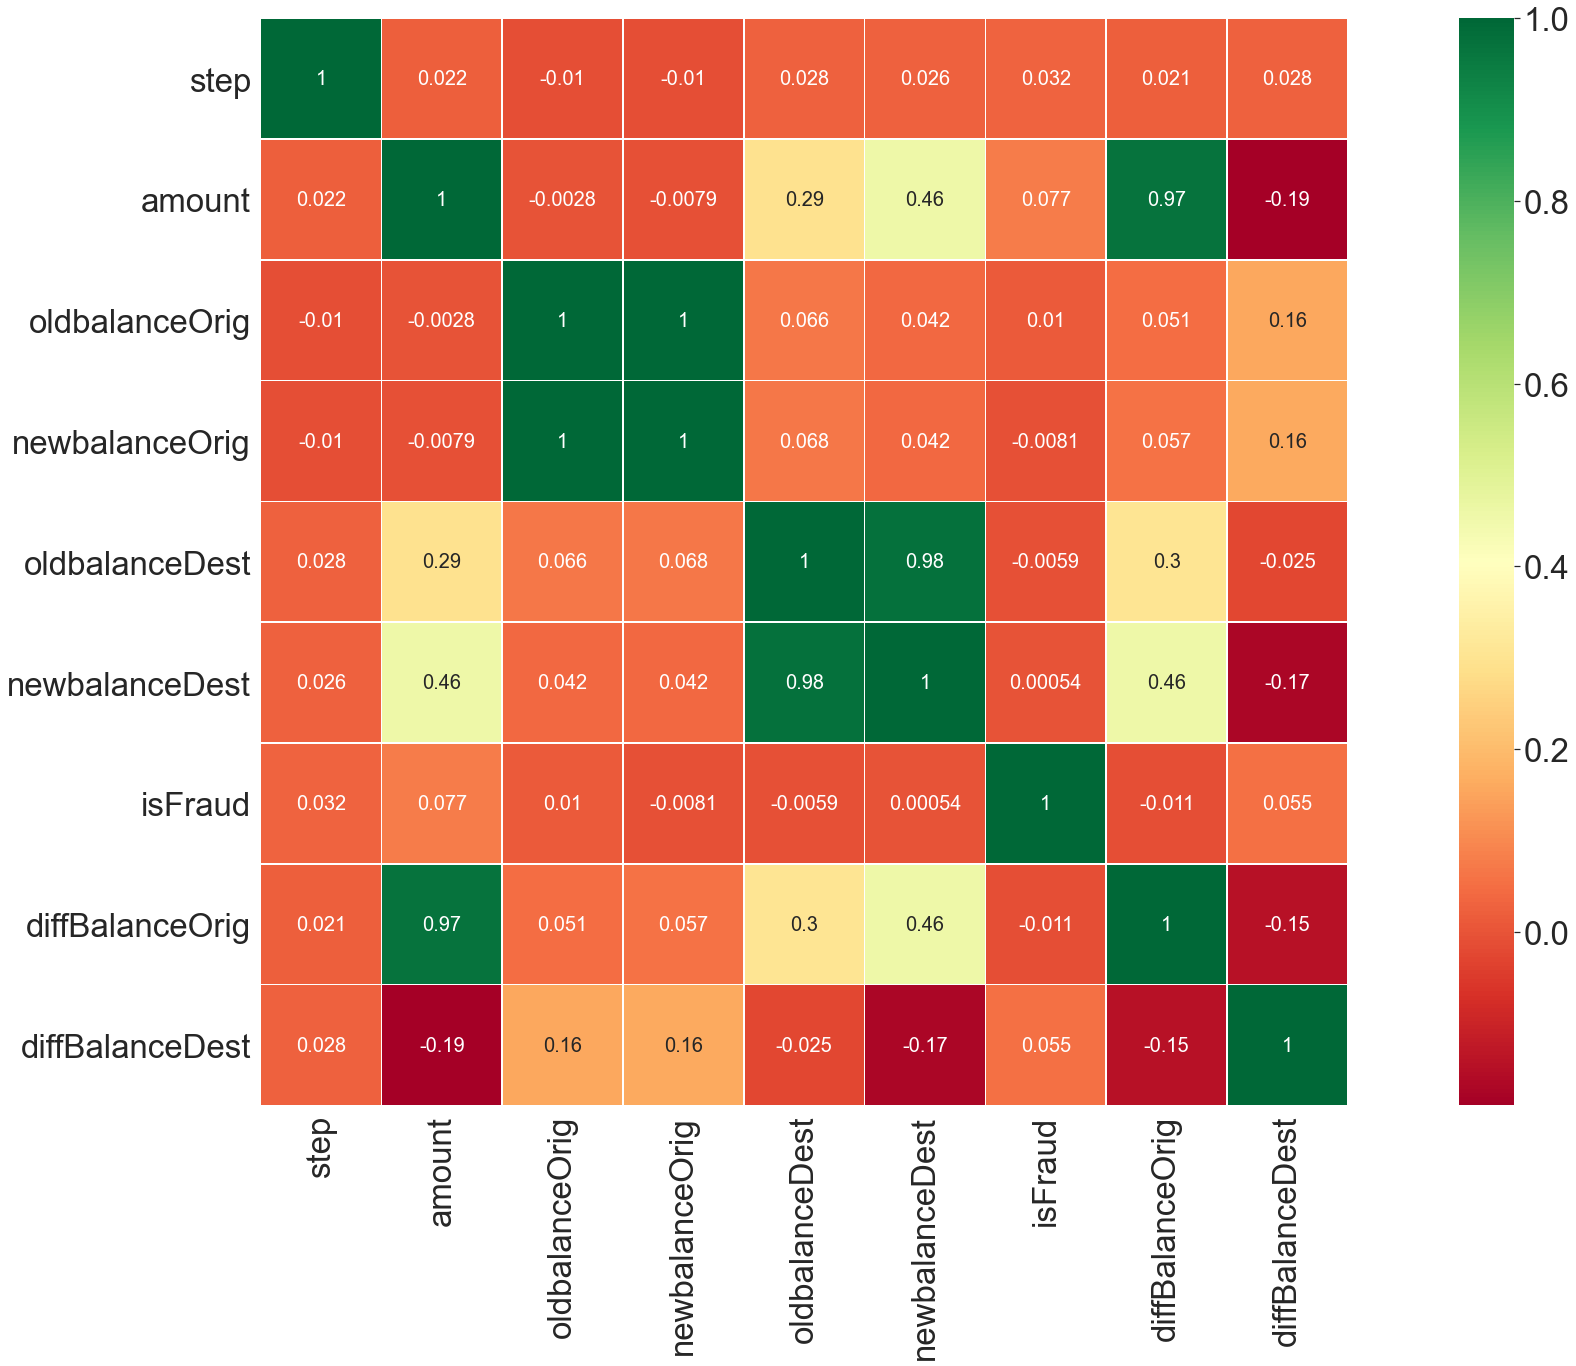

In [23]:
# Make a heatmap of the data
plt.figure(figsize=(40,20))
sns.set(font_scale = 3)
sns.heatmap(paysim.corr() ,annot=True, linewidths=.5, annot_kws={"size":20}, square=True, cmap='RdYlGn')

In [24]:
# Clean Dadaset to Disk
paysim.to_csv('../Data/paysim_cleaned.csv', index=False)